In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
# Data processing, evaluation metrics and modelling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import sklearn.metrics as sklm
import lightgbm as lgbm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Stats
import numpy.random as nr
import scipy.stats as ss
from scipy.stats import randint 

# Ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files # carregando arquivo
uploaded = files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes (3).csv


In [ ]:
df_pima_diabetes= pd.read_csv("pima-indians-diabetes.csv")

In [ ]:
df_pima_diabetes.columns = ["pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","Diabetes_Pedigree_Function","age","outcome"]
df_pima_diabetes.head()

,pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Pedigree_Function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
df_pima_diabetes.head()

,pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Pedigree_Function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
df_pima_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 767 non-null    int64  
 1   Glucose                     767 non-null    int64  
 2   BloodPressure               767 non-null    int64  
 3   SkinThickness               767 non-null    int64  
 4   Insulin                     767 non-null    int64  
 5   BMI                         767 non-null    float64
 6   Diabetes_Pedigree_Function  767 non-null    float64
 7   age                         767 non-null    int64  
 8   outcome                     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_pima_diabetes.describe()

,pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes_Pedigree_Function,age,outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_pima_diabetes['outcome'].describe()

count    767.000000
mean       0.348110
std        0.476682
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: outcome, dtype: float64

In [ ]:
df_pima_diabetes['outcome'].value_counts()

0    500
1    267
Name: outcome, dtype: int64

In [ ]:
# Checking the missing values in each feature
df_pima_diabetes.isnull().sum()

pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
age                           0
outcome                       0
dtype: int64

**Making a seperate dataframe for features containing missing values and the percentage they account out of all observations.**

In [ ]:
missing_data = pd.DataFrame({'Columns': ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],
                             'Missing_values': [df_pima_diabetes['Glucose'].isnull().sum(), df_pima_diabetes['BloodPressure'].isnull().sum(),
                                              df_pima_diabetes['SkinThickness'].isnull().sum(), df_pima_diabetes['Insulin'].isnull().sum(),
                                                df_pima_diabetes['BMI'].isnull().sum()],
                             'Percentage': [df_pima_diabetes['Glucose'].isnull().sum()/len(df_pima_diabetes['Glucose'])*100,
                                            df_pima_diabetes['BloodPressure'].isnull().sum()/len(df_pima_diabetes['BloodPressure'])*100,
                                            df_pima_diabetes['SkinThickness'].isnull().sum()/len(df_pima_diabetes['SkinThickness'])*100,
                                            df_pima_diabetes['Insulin'].isnull().sum()/len(df_pima_diabetes['Insulin'])*100,
                                            df_pima_diabetes['BMI'].isnull().sum()/len(df_pima_diabetes['BMI'])*100]})
missing_data.head()

,Columns,Missing_values,Percentage
0,Glucose,0,0.0
1,BloodPressure,0,0.0
2,SkinThickness,0,0.0
3,Insulin,0,0.0
4,BMI,0,0.0


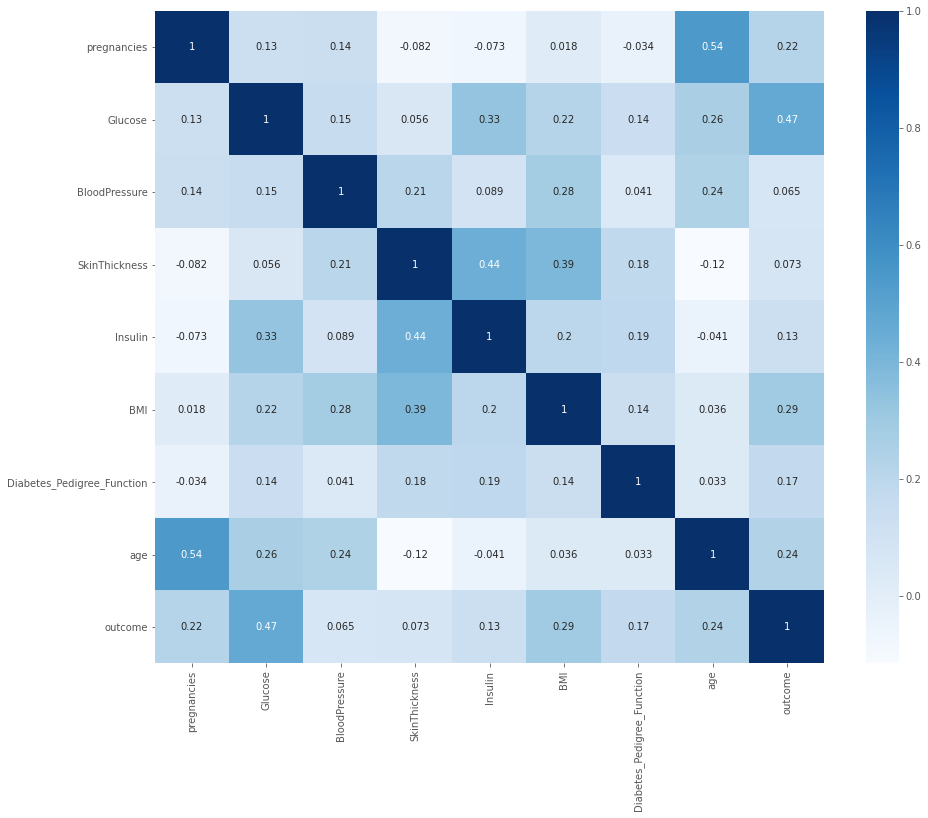

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df_pima_diabetes.corr(), cmap = 'Blues', annot = True)
plt.show()